## Hamoye ML Project Electric Cars - Team Prophet

## Data scrapped from Web - by Team 1

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Web Scrapping of Data

In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from selenium.webdriver.chrome.options import Options

car_name = []
car_model = []
car_battery = []
car_seats = []
car_acceleration = []
car_speed = []
car_distance = []
car_eff = []
car_charge = []
price_g = []
price_n = []
price_p = []


option = Options()
option.headless = True
browser = webdriver.Chrome(ChromeDriverManager().install())
url = 'https://ev-database.org/'
browser.get(url)
time.sleep(10)
browser.find_element_by_xpath('//div[@id="paging"]').click()
browser.find_element_by_xpath('//*[@id="paging"]/ul/li[4]').click()
time.sleep(20)
car_list = browser.find_elements_by_xpath('//div[@class="data-wrapper"]')
for names in car_list:
    name = names.find_element_by_xpath('.//a[@class="title"]/span').text
    car_name.append(name)
    model = names.find_element_by_xpath('.//a[@class="title"]/span[2]').text
    car_model.append(model)
    battery = names.find_element_by_xpath('.//div[@class="subtitle"]/span').text.split(' ')[0]
    car_battery.append(battery)
    seats = names.find_element_by_xpath('.//div[@class="icons"]/span[6]').text
    car_seats.append(seats)
    acceleration = names.find_element_by_xpath('.//div[@class="specs"]/p/span[2]').text.split(' ')[0]
    car_acceleration.append(acceleration)
    speed = names.find_element_by_xpath('.//div[@class="specs"]/p[2]/span[2]').text.split(' ')[0]
    car_speed.append(speed)
    distance = names.find_element_by_xpath('.//div[@class="specs"]/p[3]/span[2]').text.split(' ')[0]
    car_distance.append(distance)
    efficiency = names.find_element_by_xpath('.//div[@class="specs"]/p[4]/span[2]').text.split(' ')[0]
    car_eff.append(efficiency)
    fast_charge = names.find_element_by_xpath('.//div[@class="specs"]/p[5]/span[2]').text.split(' ')[0]
    car_charge.append(fast_charge)
    price_gbp = names.find_element_by_xpath('.//div[@class="pricing align-right"]/span[3]').text[1:]
    price_p.append(price_gbp)
    price_germany = names.find_element_by_xpath('.//div[@class="pricing align-right"]/span[1]').text[1:]
    price_g.append(price_germany)
    price_netherland = names.find_element_by_xpath('.//div[@class="pricing align-right"]/span[2]').text[1:]
    price_n.append(price_netherland)

# saving the data into a dictionary and then turning it into a csv file
car_data = {'vehicle_name':car_name,'model':car_model,'battery':car_battery,'seats':car_seats,
            'acceleration':car_acceleration,'top_speed':car_speed,'distance':car_distance,'efficiency':car_eff,
            'fast_charge':car_charge,'price_pounds':price_p,'price_germany':price_g,'price_netherland':price_n}
# print(car_data)
car_df = pd.DataFrame().from_dict(car_data)



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Driver [C:\Users\krane\.wdm\drivers\chromedriver\win32\92.0.4515.107\chromedriver.exe] found in cache


In [6]:
# Check the dataframe
car_df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland
0,Renault,Megane E-Tech EV60 220hp,60,5,7.4,160,360,167,520,"£35,000","€40,000","€40,000"
1,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,"40,990","43,560","49,990"
2,Kia,EV6 GT,77.4,5,3.5,260,395,196,920,"58,295","65,990","63,595"
3,Tesla,Model Y Long Range Dual Motor,70,7,5.0,217,410,171,590,"£54,000","59,965","65,010"
4,Mercedes,EQS 580 4MATIC,107.8,5,4.3,210,610,177,800,"£115,000","135,529","154,949"


In [7]:
# Export the dataframe to CSV file, for later quick reference
car_df.to_csv('D:\People\Amit\Hamoye\project\\electric_cars.csv')

## Data Cleaning and Treatment by Team 2 and 3

In [10]:
# Read/Load the dataset from local CSV file
# Writing index_col=0 doesn't add additional column 'Unnamed: 0', while importing data from CSV File
df = pd.read_csv('D:\People\Amit\Hamoye\project\\electric_cars.csv', index_col=0)

In [11]:
# check the dataframe
df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland
0,Renault,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,"£35,000","€40,000","€40,000"
1,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,"40,990","43,560","49,990"
2,Kia,EV6 GT,77.4,5,3.5,260,395,196,920,"58,295","65,990","63,595"
3,Tesla,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,"£54,000","59,965","65,010"
4,Mercedes,EQS 580 4MATIC,107.8,5,4.3,210,610,177,800,"£115,000","135,529","154,949"


In [12]:
# check the data-types
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge          object
price_pounds         object
price_germany        object
price_netherland     object
dtype: object

#### Here, apart from vehicle_name and model all other columns should be numeric, lets convert them to Numeric types.

In [15]:
df = df.astype({'fast_charge': np.int})

ValueError: invalid literal for int() with base 10: '-'

#### Observe that fast-charge is not converting to int type because of string value '-'
#### Let us find and replace it

In [16]:
# Find '-' in dataset
df[df.isin(['-'])].stack()

69   fast_charge    -
113  fast_charge    -
128  fast_charge    -
142  fast_charge    -
168  fast_charge    -
dtype: object

#### Its present only in fast-charge column

In [17]:
# Replace string '-' with Null Value
df['fast_charge']=df['fast_charge'].replace(to_replace='-', value=np.NaN)

In [20]:
# Check Null values
df['fast_charge'].isnull().sum()

5

In [21]:
# Replace Null values with Median values
df['fast_charge'] = df['fast_charge'].fillna(df['fast_charge'].median())

In [22]:
# re-check Null values
df['fast_charge'].isnull().sum()

0

In [25]:
# Now convert fast-charge to Numeric type 
df = df.astype({'fast_charge': np.int})

In [26]:
#Check data-types
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds         object
price_germany        object
price_netherland     object
dtype: object

#### Let us convert price_pounds, price_germany and price_netherland to Numeric types

In [27]:
df = df.astype({'price_pounds': np.int})

ValueError: invalid literal for int() with base 10: ' £35,000'

#### Its not getting converted, we need to clean it first

In [38]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_pounds'] = df['price_pounds'].str.replace(',', '')
df['price_pounds'] = df['price_pounds'].str.replace('£', '')
df['price_pounds'] = df['price_pounds'].str.replace('€', '')
df['price_pounds'] = df['price_pounds'].str.replace('/A', '')
df['price_pounds'] = df['price_pounds'].replace(to_replace='', value=np.NaN)

In [39]:
#Check its Null values
df['price_pounds'].isnull().sum()

45

In [40]:
#Check its dtype
df['price_pounds'].dtype

dtype('O')

In [42]:
#Convert it into numeric type
df = df.astype({'price_pounds': np.float32})

In [44]:
# Check its dtype again
df['price_pounds'].dtype

dtype('float32')

#### Now we do similar cleaning for price_germany and price_netherland

In [45]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_germany'] = df['price_germany'].str.replace(',', '')
df['price_germany'] = df['price_germany'].str.replace('£', '')
df['price_germany'] = df['price_germany'].str.replace('€', '')
df['price_germany'] = df['price_germany'].str.replace('/A', '')
df['price_germany'] = df['price_germany'].replace(to_replace='', value=np.NaN)
#Converting it to Numric data-type
df = df.astype({'price_germany': np.float32})

In [49]:
#Cleaning comma(,), curency symbols(£,€), and replacing N/A(/A) values with Null(NaN).
df['price_netherland'] = df['price_netherland'].str.replace(',', '')
df['price_netherland'] = df['price_netherland'].str.replace('£', '')
df['price_netherland'] = df['price_netherland'].str.replace('€', '')
df['price_netherland'] = df['price_netherland'].str.replace('/A', '')
df['price_netherland'] = df['price_netherland'].replace(to_replace='', value=np.NaN)
#Converting it to Numric data-type
df = df.astype({'price_netherland': np.float32})

In [50]:
#Check overall data-type
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
dtype: object

In [51]:
#check dataset
df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland
0,Renault,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,35000.0,40000.0,40000.0
1,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,40990.0,43560.0,49990.0
2,Kia,EV6 GT,77.4,5,3.5,260,395,196,920,58295.0,65990.0,63595.0
3,Tesla,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,54000.0,59965.0,65010.0
4,Mercedes,EQS 580 4MATIC,107.8,5,4.3,210,610,177,800,115000.0,135529.0,154949.0


In [52]:
#Check Null values
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        45
price_germany       13
price_netherland    25
dtype: int64

#### The three price columns have Null values, and price_germany has least Null Values. It is suggested that instead of keeping prices in three different currencies, we can convert the price to universal currency USD value. But before that we will see it price_germany has any outliers.

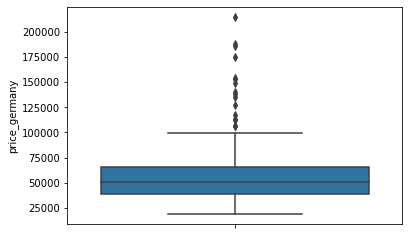

In [55]:
#Plot the price_germany using box-plot to visualize Outliers
sns.boxplot(x='price_germany',data=df,orient='v')

#### We observe many outliers on the upper side. 

In [57]:
#Lets see how to get the outliers
Q1 = df['price_germany'].quantile(0.25) #First Quantile
Q3 = df['price_germany'].quantile(0.75) # Third Quantile
IQR = Q3 - Q1 #Interquantile Range

#### Upper side Outliers are Q3+1.5(IQR)
#### Lower side Outliers are Q1-1.5(IQR)

In [59]:
## storing index locations of upper and lower outliers
index_upper = df[df['price_germany'] >= (Q3+1.5*IQR)].index
index_lower = df[df['price_germany'] <= (Q1-1.5*IQR)].index

In [60]:
# Check upper outliers
df.iloc[index_upper]

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland
4,Mercedes,EQS 580 4MATIC,107.8,5,4.3,210,610,177,800,115000.0,135529.0,154949.0
14,Mercedes,EQS 450+,107.8,5,6.2,210,640,168,840,95000.0,106374.0,118891.0
17,Audi,e-tron GT RS,85.0,4,3.3,250,405,210,810,110950.0,138200.0,146295.0
25,Tesla,Model S Plaid,90.0,5,2.1,322,535,168,800,118980.0,126990.0,131000.0
37,Porsche,Taycan Turbo S,83.7,4,2.8,260,390,215,860,138830.0,186336.0,191700.0
49,Lightyear,One,60.0,5,10.0,150,575,104,540,NaN,149000.0,149990.0
78,Tesla,Roadster,200.0,4,2.1,410,970,206,920,189000.0,215000.0,215000.0
84,Lucid,Air Grand Touring,110.0,5,3.2,270,660,167,1380,125000.0,140000.0,140000.0
111,Tesla,Model X Plaid,90.0,7,2.6,262,455,198,680,110980.0,116990.0,121000.0
115,Porsche,Taycan 4S,71.0,4,4.0,250,375,189,750,83580.0,106487.0,110600.0


In [62]:
# Check lower outlier
df.iloc[index_lower]

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland


In [65]:
df.iloc[index_upper].count()

vehicle_name        16
model               16
battery             16
seats               16
acceleration        16
top_speed           16
distance            16
efficiency          16
fast_charge         16
price_pounds        15
price_germany       16
price_netherland    16
dtype: int64

In [67]:
#### We have 16 Outliers on Upper side. Dropping outliers from price_germanythem using below code
df.drop(index_upper, inplace=True)
df.drop(index_lower, inplace=True)

In [68]:
#Replacing the Null values with Median values.
df['price_germany'] = df['price_germany'].fillna(df['price_germany'].median())

In [69]:
#Check datset
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
dtype: object

In [70]:
#Check Null values
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany        0
price_netherland    25
dtype: int64

In [77]:
#### Now we use price_germany to get prices in USD
df['price_usd'] = round((df['price_germany']/1.18))

In [81]:
#check dataset
df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland,price_usd
0,Renault,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,35000.0,40000.0,40000.0,33898.0
1,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,40990.0,43560.0,49990.0,36915.0
2,Kia,EV6 GT,77.4,5,3.5,260,395,196,920,58295.0,65990.0,63595.0,55924.0
3,Tesla,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,54000.0,59965.0,65010.0,50818.0
5,Skoda,Enyaq iV 80,77.0,5,8.6,160,420,183,510,39365.0,43950.0,47780.0,37246.0


In [82]:
#check dtypes
df.dtypes

vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
price_usd           float32
dtype: object

In [83]:
#check Null values
df.isnull().sum()

vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany        0
price_netherland    25
price_usd            0
dtype: int64

## Trying to get some insights from the Data

##### Top 5 Car Brands as per Average values of their Models

In [147]:
# Top 5 Car Brands as per Average values of their EV Car Models
df.groupby('vehicle_name')['price_usd'].mean().sort_values(ascending=False).head(5)

vehicle_name
Porsche    75254.335938
Lucid      74152.500000
Jaguar     65508.000000
Audi       54875.562500
BMW        54770.000000
Name: price_usd, dtype: float32

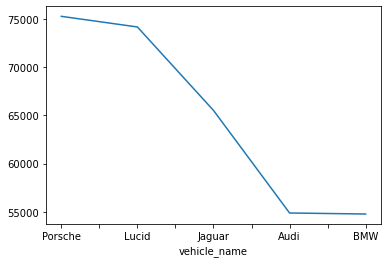

In [157]:
df.groupby('vehicle_name')['price_usd'].mean().sort_values(ascending=False).head(5).plot()
plt.show()

#### Top 5 Car Brands with maximum no. of Models

In [108]:
#### Top 5 Car Brands with maximum no. of Models
df['vehicle_name'].value_counts().head(5)

Audi          16
Tesla         12
Volkswagen    11
Hyundai       10
Kia            9
Name: vehicle_name, dtype: int64

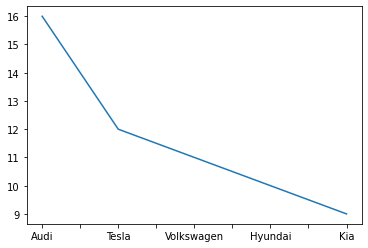

In [156]:
df['vehicle_name'].value_counts().head(5).plot()
plt.show()

#### Top 5 Car Models with Highest Top Speed

In [144]:
df1 = df[['vehicle_name','model','top_speed']]
df1.sort_values('top_speed',ascending=False).head()

,vehicle_name,model,top_speed
33,Tesla,Model 3 Performance,261
2,Kia,EV6 GT,260
163,Lucid,Air Touring,250
65,Tesla,Model S Long Range,250
88,Tesla,Model X Long Range,250


#### Top 5 Cars with highest Battery back-up

In [145]:
df2 = df[['vehicle_name','model','battery']]
df2.sort_values('battery',ascending=False).head()

,vehicle_name,model,battery
43,Tesla,Cybertruck Tri Motor,200.0
137,Tesla,Cybertruck Dual Motor,120.0
32,BMW,iX xDrive50,105.2
129,Tesla,Cybertruck Single Motor,100.0
149,Byton,M-Byte 95 kWh 4WD,95.0


#### Distribution of Car prices across the datset

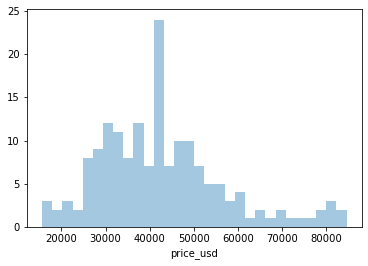

In [163]:
sns.distplot(df['price_usd'],kde=False,bins=30)

#### Correlation among various Features in dataset

In [175]:
features1 = df[['battery', 'seats', 'acceleration', 'top_speed', 'distance', 'efficiency', 'fast_charge', 'price_usd']]

In [177]:
corr = features1.corr()

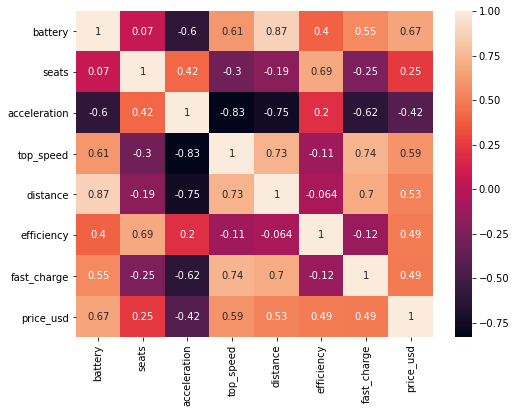

In [181]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

#### We can see very High correlation between Distance and Battery(0.87). Also, good correlation between Fast-charge and Top speed(0.74).  Also target variable price_usd has a moderate correlation with battery(0.67).

## ...To be Continued

In [195]:
# Check Unique names in vehicle_names
df['vehicle_name'].sort_values().unique()

array(['Aiways', 'Audi', 'BMW', 'Byton', 'CUPRA', 'Citroen', 'DS',
       'Dacia', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'JAC', 'Jaguar',
       'Kia', 'Lexus', 'Lucid', 'MG', 'Mazda', 'Mercedes', 'Mini',
       'Nissan', 'Opel', 'Peugeot', 'Polestar', 'Porsche', 'Renault',
       'SEAT', 'Seres', 'Skoda', 'Smart', 'Sono', 'Tesla', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

In [209]:
#Manual Encoding of Values
cleanup_names = {"vehicle_name" : {'Aiways':1, 'Audi':2, 'BMW':3, 'Byton':4, 'CUPRA':5, 'Citroen':6, 'DS':7,
      'Dacia':8, 'Fiat':9, 'Ford':10, 'Honda':11, 'Hyundai':12, 'JAC':13, 'Jaguar':14,
       'Kia':15, 'Lexus':16, 'Lucid':17, 'MG':18, 'Mazda':19, 'Mercedes':20, 'Mini':21,
       'Nissan':22, 'Opel':23, 'Peugeot':24, 'Polestar':25, 'Porsche':26, 'Renault':27,
       'SEAT':28, 'Seres':29, 'Skoda':30, 'Smart':31, 'Sono':32, 'Tesla':33, 'Toyota':34,
       'Volkswagen':35, 'Volvo':36}
                }

In [211]:
df = df.replace(cleanup_names)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [207]:
#ALternate Method Oridnal Encoding using Scikit
#from sklearn.preprocessing import OrdinalEncoder

#ord_enc = OrdinalEncoder()
#df['vehicle_name_code'] = ord_enc.fit_transform(df[['vehicle_name']])
#df[['vehicle_name_code', 'vehicle_name']].head(11)

,vehicle_name_code,vehicle_name
0,26.0,27
1,32.0,33
2,14.0,15
3,32.0,33
5,29.0,30
6,32.0,33
7,7.0,8
8,32.0,33
9,21.0,22
10,11.0,12


In [214]:
#df.drop('vehicle_name_code',inplace=True,axis=1)

In [215]:
df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland,price_usd
0,27,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,35000.0,40000.0,40000.0,33898.0
1,33,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,40990.0,43560.0,49990.0,36915.0
2,15,EV6 GT,77.4,5,3.5,260,395,196,920,58295.0,65990.0,63595.0,55924.0
3,33,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,54000.0,59965.0,65010.0,50818.0
5,30,Enyaq iV 80,77.0,5,8.6,160,420,183,510,39365.0,43950.0,47780.0,37246.0


In [238]:
df['vehicle_name'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

In [239]:
df.head()

,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland,price_usd
0,27,Megane E-Tech EV60 220hp,60.0,5,7.4,160,360,167,520,35000.0,40000.0,40000.0,33898.0
1,33,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,630,40990.0,43560.0,49990.0,36915.0
2,15,EV6 GT,77.4,5,3.5,260,395,196,920,58295.0,65990.0,63595.0,55924.0
3,33,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,590,54000.0,59965.0,65010.0,50818.0
5,30,Enyaq iV 80,77.0,5,8.6,160,420,183,510,39365.0,43950.0,47780.0,37246.0


In [240]:
#Check dtypes
df.dtypes

vehicle_name          int64
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge           int32
price_pounds        float32
price_germany       float32
price_netherland    float32
price_usd           float32
dtype: object

In [241]:
df.columns

Index(['vehicle_name', 'model', 'battery', 'seats', 'acceleration',
       'top_speed', 'distance', 'efficiency', 'fast_charge', 'price_pounds',
       'price_germany', 'price_netherland', 'price_usd'],
      dtype='object')

## Features and Target

In [242]:
features = df[['vehicle_name', 'battery', 'seats', 'acceleration',
       'top_speed', 'distance', 'efficiency', 'fast_charge']]
y = df['price_usd']

In [243]:
features.head()

,vehicle_name,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge
0,27,60.0,5,7.4,160,360,167,520
1,33,52.5,5,5.6,225,350,150,630
2,15,77.4,5,3.5,260,395,196,920
3,33,70.0,7,5.0,217,410,171,590
5,30,77.0,5,8.6,160,420,183,510


## Scaling the data

In [244]:
# Normalizing the data using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [245]:
x.head()

,vehicle_name,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge
0,0.742857,0.236225,0.428571,0.226804,0.268116,0.404580,0.167883,0.310078
1,0.914286,0.195308,0.428571,0.134021,0.739130,0.389313,0.043796,0.395349
2,0.400000,0.331151,0.428571,0.025773,0.992754,0.458015,0.379562,0.620155
3,0.914286,0.290780,0.714286,0.103093,0.681159,0.480916,0.197080,0.364341
4,0.828571,0.328969,0.428571,0.288660,0.268116,0.496183,0.284672,0.302326


## Train Test Split

In [246]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Linear Regression

In [247]:
## Linear Regression
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
pred_1 = linear_model.predict(x_test)

In [248]:
# Import Metrics for evaluation
from sklearn import metrics

In [249]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_1))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_1))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_1)))
print('R2 score', metrics.r2_score(y_test,pred_1))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_1))

Mean Absolute Error (MAE) 5765.653566021303
Mean Square Error (MSE) 58366080.69177344
Root Mean Square Error (RMSE) 7639.76967530916
R2 score 0.6938611280381528
Explained Variance score 0.6995213968197362


## Ridge Regression

In [250]:
#Using Ridge Regression with Alpha = 0.5
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)
pred_2 = ridge_reg.predict(x_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_2))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_2)) #R2 Score

Root Mean Square Error (RMSE) 7824.373789096267
R2 score 0.678887563760301


In [251]:
ridge_reg_2 = Ridge(alpha=2)
ridge_reg_2.fit(x_train, y_train)
pred_3 = ridge_reg_2.predict(x_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_3))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_3)) #R2 Score

Root Mean Square Error (RMSE) 8242.212066137787
R2 score 0.6436756388115774


In [252]:
ridge_reg_4 = Ridge(alpha=4)
ridge_reg_4.fit(x_train, y_train)
pred_4 = ridge_reg_4.predict(x_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_4))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_4)) #R2 Score

Root Mean Square Error (RMSE) 8797.38056809598
R2 score 0.5940573283366666


## Random Forest

In [253]:
#Random FOrest
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(x_train,y_train)
pred_5 = rfc.predict(x_test)

In [254]:
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_5))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_5)) #R2 Score

Root Mean Square Error (RMSE) 6962.474767543199
R2 score 0.7457358009157622


## XGboost

In [256]:
#Xgboost Model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train,y_train)
pred_6 = xgb.predict(x_test)
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_6))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_6)) #R2 Score

Root Mean Square Error (RMSE) 7760.32
R2 score 0.6841235990291694


## Trying without removing outliers

In [1]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('D:\\People\\Amit\\Hamoye\\project\\electric_cars_with-outlier.csv', index_col=0)

In [48]:
df.head()

,Unnamed: 0.1,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland
0,0,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,560.0,40990.0,43560.0,49990.0
1,1,Mercedes,EQS 580 4MATIC,107.8,5,4.3,210,610,177,800.0,115000.0,135529.0,140000.0
2,2,Tesla,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,520.0,54000.0,59965.0,65010.0
3,3,Kia,EV6 GT,77.4,5,3.5,260,395,196,920.0,58295.0,65990.0,63595.0
4,4,Tesla,Model 3 Long Range Dual Motor,70.0,5,4.4,233,455,154,570.0,48490.0,NaN,NaN


In [49]:
df.dtypes

Unnamed: 0.1          int64
vehicle_name         object
model                object
battery             float64
seats                 int64
acceleration        float64
top_speed             int64
distance              int64
efficiency            int64
fast_charge         float64
price_pounds        float64
price_germany       float64
price_netherland    float64
dtype: object

In [50]:
df.isnull().sum()

Unnamed: 0.1         0
vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          5
price_pounds        45
price_germany       13
price_netherland    25
dtype: int64

In [51]:
df.shape

(181, 13)

In [52]:
df[df['fast_charge'].isnull()]

,Unnamed: 0.1,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland
67,67,Renault,Twingo Electric,21.3,4,12.6,135,130,164,NaN,NaN,24790.0,20690.0
110,110,Renault,Kangoo Maxi ZE 33,31.0,5,22.4,130,160,194,NaN,31680.0,NaN,38801.0
127,127,Smart,EQ forfour,16.7,4,12.7,130,95,176,NaN,19795.0,19120.0,23995.0
136,136,Smart,EQ fortwo coupe,16.7,2,11.6,130,100,167,NaN,19200.0,18460.0,23995.0
165,165,Smart,EQ fortwo cabrio,16.7,2,11.9,130,95,176,NaN,21620.0,21720.0,26995.0


In [53]:
df.shape

(181, 13)

In [54]:
df = df.dropna(subset=['fast_charge'])

In [55]:
df.shape

(176, 13)

In [56]:
df.isnull().sum()

Unnamed: 0.1         0
vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        44
price_germany       12
price_netherland    25
dtype: int64

In [57]:
df = df.dropna(subset=['price_germany'])

In [58]:
df.shape

(164, 13)

In [59]:
df.isnull().sum()

Unnamed: 0.1         0
vehicle_name         0
model                0
battery              0
seats                0
acceleration         0
top_speed            0
distance             0
efficiency           0
fast_charge          0
price_pounds        41
price_germany        0
price_netherland    18
dtype: int64

In [60]:
#### Now we use price_germany to get prices in USD
df['price_usd'] = round((df['price_germany']/1.18))

In [61]:
df.head()

,Unnamed: 0.1,vehicle_name,model,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge,price_pounds,price_germany,price_netherland,price_usd
0,0,Tesla,Model 3 Standard Range Plus LFP,52.5,5,5.6,225,350,150,560.0,40990.0,43560.0,49990.0,36915.0
1,1,Mercedes,EQS 580 4MATIC,107.8,5,4.3,210,610,177,800.0,115000.0,135529.0,140000.0,114855.0
2,2,Tesla,Model Y Long Range Dual Motor,70.0,7,5.0,217,410,171,520.0,54000.0,59965.0,65010.0,50818.0
3,3,Kia,EV6 GT,77.4,5,3.5,260,395,196,920.0,58295.0,65990.0,63595.0,55924.0
5,5,Skoda,Enyaq iV 80,77.0,5,8.6,160,420,183,510.0,39365.0,43950.0,47780.0,37246.0


In [62]:
#ALternate Method Oridnal Encoding using Scikit
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['vehicle_name_code'] = ord_enc.fit_transform(df[['vehicle_name']])
df[['vehicle_name_code', 'vehicle_name']].head(11)

,vehicle_name_code,vehicle_name
0,30.0,Tesla
1,19.0,Mercedes
2,30.0,Tesla
3,13.0,Kia
5,28.0,Skoda
6,30.0,Tesla
7,7.0,Dacia
8,21.0,Nissan
9,11.0,Hyundai
10,11.0,Hyundai


In [66]:
df['vehicle_name_code'].value_counts().sort_values()

0.0      1
6.0      1
27.0     1
20.0     1
7.0      1
29.0     1
15.0     1
12.0     1
18.0     1
14.0     1
33.0     2
10.0     2
16.0     3
24.0     3
3.0      3
8.0      4
26.0     4
9.0      4
17.0     4
4.0      4
31.0     4
28.0     5
5.0      6
2.0      7
21.0     8
22.0     8
13.0     8
32.0     8
23.0     9
19.0     9
25.0    10
11.0    10
30.0    14
1.0     15
Name: vehicle_name_code, dtype: int64

In [68]:
df['vehicle_name'].sort_values().nunique()

34

In [69]:
df['vehicle_name'].sort_values().unique()

array(['Aiways', 'Audi', 'BMW', 'Byton', 'CUPRA', 'Citroen', 'DS',
       'Dacia', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Kia',
       'Lexus', 'Lightyear', 'Lucid', 'MG', 'Mazda', 'Mercedes', 'Mini',
       'Nissan', 'Opel', 'Peugeot', 'Polestar', 'Porsche', 'Renault',
       'SEAT', 'Skoda', 'Sono', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

In [76]:
df['vehicle_name_code'].value_counts().sort_values()

0.0      1
6.0      1
27.0     1
20.0     1
7.0      1
29.0     1
15.0     1
12.0     1
18.0     1
14.0     1
33.0     2
10.0     2
16.0     3
24.0     3
3.0      3
8.0      4
26.0     4
9.0      4
17.0     4
4.0      4
31.0     4
28.0     5
5.0      6
2.0      7
21.0     8
22.0     8
13.0     8
32.0     8
23.0     9
19.0     9
25.0    10
11.0    10
30.0    14
1.0     15
Name: vehicle_name_code, dtype: int64

In [77]:
df.isnull().sum()

Unnamed: 0.1          0
vehicle_name          0
model                 0
battery               0
seats                 0
acceleration          0
top_speed             0
distance              0
efficiency            0
fast_charge           0
price_pounds         41
price_germany         0
price_netherland     18
price_usd             0
vehicle_name_code     0
dtype: int64

In [78]:
features = df[['vehicle_name_code', 'battery', 'seats', 'acceleration',
       'top_speed', 'distance', 'efficiency', 'fast_charge']]
y = df['price_usd']

In [79]:
# Normalizing the data using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [80]:
x.head()

,vehicle_name_code,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge
0,0.909091,0.162883,0.2,0.271318,0.355401,0.229814,0.259887,0.341085
1,0.575758,0.476731,0.2,0.170543,0.303136,0.552795,0.412429,0.527132
2,0.909091,0.262202,0.6,0.224806,0.327526,0.304348,0.378531,0.310078
3,0.393939,0.304200,0.2,0.108527,0.477352,0.285714,0.519774,0.620155
4,0.848485,0.301930,0.2,0.503876,0.128920,0.316770,0.446328,0.302326


In [82]:
y.head()

0     36915.0
1    114855.0
2     50818.0
3     55924.0
5     37246.0
Name: price_usd, dtype: float64

In [83]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [84]:
## Linear Regression
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
pred_1 = linear_model.predict(x_test)

In [85]:
# Import Metrics for evaluation
from sklearn import metrics

In [86]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_1))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_1))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_1)))
print('R2 score', metrics.r2_score(y_test,pred_1))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_1))

Mean Absolute Error (MAE) 12227.75383348707
Mean Square Error (MSE) 368256906.7783562
Root Mean Square Error (RMSE) 19190.021020789845
R2 score 0.5325927228011043
Explained Variance score 0.5774540001613665


In [88]:
import seaborn as sns

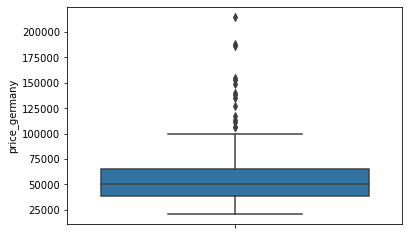

In [89]:
#Plot the price_germany using box-plot to visualize Outliers
sns.boxplot(x='price_germany',data=df,orient='v')

In [90]:
#Random FOrest
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(x_train,y_train)
pred_5 = rfc.predict(x_test)

In [93]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_5))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_5))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_5))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_5)) #R2 Score
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_5))

Mean Absolute Error (MAE) 6142.448736190475
Mean Square Error (MSE) 128806802.19800985
Root Mean Square Error (RMSE) 11349.308445804521
R2 score 0.8365129462831653
Explained Variance score 0.8376707612472426


In [94]:
#Xgboost Model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train,y_train)
pred_6 = xgb.predict(x_test)
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_6))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_6))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_6))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_6)) #R2 Score
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_6))

Mean Absolute Error (MAE) 4901.71748046875
Mean Square Error (MSE) 209574439.81373933
Root Mean Square Error (RMSE) 14476.68607844141
R2 score 0.7339992367263836
Explained Variance score 0.7434263815582749


In [95]:
df.dtypes

Unnamed: 0.1           int64
vehicle_name          object
model                 object
battery              float64
seats                  int64
acceleration         float64
top_speed              int64
distance               int64
efficiency             int64
fast_charge          float64
price_pounds         float64
price_germany        float64
price_netherland     float64
price_usd            float64
vehicle_name_code    float64
dtype: object

## Version 2

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('D:\\People\\Amit\\Hamoye\\project\\electric_cars_with-outlier.csv')

In [98]:
df = df.dropna(subset=['fast_charge'])

In [99]:
df = df.dropna(subset=['price_germany'])

In [100]:
#### Now we use price_germany to get prices in USD
df['price_usd'] = round((df['price_germany']/1.18))

In [101]:
features = df[['battery', 'seats', 'acceleration',
       'top_speed', 'distance', 'efficiency', 'fast_charge']]
y = df['price_usd']

In [102]:
# Normalizing the data using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

In [103]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [104]:
## Linear Regression
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
pred_1 = linear_model.predict(x_test)

In [105]:
# Import Metrics for evaluation
from sklearn import metrics

In [106]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_1))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_1))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_1)))
print('R2 score', metrics.r2_score(y_test,pred_1))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_1))

Mean Absolute Error (MAE) 12086.85039882347
Mean Square Error (MSE) 358421818.61993784
Root Mean Square Error (RMSE) 18932.0315502573
R2 score 0.5450758336199986
Explained Variance score 0.5854502293586443


In [107]:
#Import Random Forest
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(x_train,y_train)
pred_2 = rfc.predict(x_test)

In [108]:
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_2))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_2))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_2)))
print('R2 score', metrics.r2_score(y_test,pred_2))
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_2))

Mean Absolute Error (MAE) 5714.169210793653
Mean Square Error (MSE) 107998083.22679602
Root Mean Square Error (RMSE) 10392.212624210304
R2 score 0.8629242545228936
Explained Variance score 0.8632182237426644


In [109]:
#Xgboost Model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train,y_train)
pred_6 = xgb.predict(x_test)
print('Mean Absolute Error (MAE)', metrics.mean_absolute_error(y_test,pred_6))
print('Mean Square Error (MSE)', metrics.mean_squared_error(y_test,pred_6))
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,pred_6))) #RMSE
print('R2 score', metrics.r2_score(y_test,pred_6)) #R2 Score
print('Explained Variance score', metrics.explained_variance_score(y_test,pred_6))

Mean Absolute Error (MAE) 5200.990703125
Mean Square Error (MSE) 173675241.0603247
Root Mean Square Error (RMSE) 13178.590253146378
R2 score 0.7795640216200304
Explained Variance score 0.7883693520549205


In [110]:
x

,battery,seats,acceleration,top_speed,distance,efficiency,fast_charge
0,0.162883,0.2,0.271318,0.355401,0.229814,0.259887,0.341085
1,0.476731,0.2,0.170543,0.303136,0.552795,0.412429,0.527132
2,0.262202,0.6,0.224806,0.327526,0.304348,0.378531,0.310078
3,0.304200,0.2,0.108527,0.477352,0.285714,0.519774,0.620155
4,0.301930,0.2,0.503876,0.128920,0.316770,0.446328,0.302326
...,...,...,...,...,...,...,...
159,0.120318,0.8,0.775194,0.024390,0.024845,0.785311,0.100775
160,0.120318,1.0,0.775194,0.024390,0.024845,0.785311,0.100775
161,0.120318,0.8,0.775194,0.024390,0.018634,0.824859,0.093023
162,0.120318,1.0,0.775194,0.024390,0.012422,0.864407,0.085271
